
# Counterparty Credit Risk (CCR) Modeling

Counterparty Credit Risk (CCR) modeling is a critical process for financial institutions, enabling them to effectively manage the risks associated with counterparty defaults. This modeling is essential for maintaining stability and ensuring compliance within the financial system.

Effective CCR modeling serves several key purposes:

- **Risk Management**: It allows institutions to identify, assess, and mitigate potential losses arising from counterparty defaults, thereby enhancing overall risk management strategies.
  
- **Capital Allocation**: CCR modeling informs the necessary capital reserves that must be maintained against potential losses, ensuring adherence to regulatory requirements and promoting financial resilience.
  
- **Pricing and Valuation**: It plays a crucial role in the pricing of derivatives and other financial instruments, ensuring that risks are accurately reflected in market prices and facilitating fair valuation.


### Key Components of CCR Modeling

Counterparty credit risk modeling is a critical aspect of risk management in financial institutions, particularly in the context of derivatives and other financial contracts where one party's default can lead to significant losses for the other party. Below is an overview of the key components involved in CCR modeling:

- **Exposure at Default (EAD)**:  
  EAD measures the potential loss that could occur if the counterparty defaults. It takes into account the current value of the exposure as well as potential future exposure (PFE) over the life of the transaction.

- **Probability of Default (PD)**:  
  PD represents the likelihood that the counterparty will default on its obligations. This can be estimated using historical default rates, credit ratings, or market-based measures such as credit default swaps (CDS) spreads.

- **Loss Given Default (LGD)**:  
  LGD indicates the percentage of the exposure that would be lost in the event of a default. This metric can vary based on factors such as the type of collateral, the seniority of the debt, and recovery rates observed in similar situations.

- **Netting and Collateral**:  
  Financial institutions often employ netting agreements to reduce exposure by offsetting positive and negative exposures. Additionally, collateral agreements can mitigate risk by requiring the counterparty to post collateral against their obligations.

- **Credit Valuation Adjustment (CVA)**:  
  CVA is a risk management tool that quantifies the risk of counterparty default in the pricing of derivatives. It represents the difference between the risk-free value of a derivative and its true value, accounting for the possibility of counterparty default.  Please see my **CVA_Counterparty_Risk_Modeling** notebook on how to estimate CVA using Monte Carlo simulation.




### Modeling Approaches

1. **Structural Models**:  
   Structural models are grounded in the economic fundamentals of the counterparty. They typically utilize the firm's asset values and liabilities to estimate the probability of default (PD). By analyzing the relationship between these financial metrics, these models provide insights into the likelihood of a counterparty defaulting on its obligations.

2. **Reduced-Form Models**:  
   Reduced-form models focus on the statistical properties of default events rather than the underlying economic factors. These models leverage historical data to estimate PD and Loss Given Default (LGD), allowing for a more straightforward approach to assessing counterparty risk without delving into the complexities of the counterparty's financial health.

3. **Simulation Techniques**:  
   Monte Carlo simulations are widely used to model CCR by simulating a range of possible future states of the world. This approach enables the estimation of EAD, PD, and LGD under various scenarios, providing a comprehensive view of potential risks associated with counterparty defaults.

4. **Regulatory Frameworks**:  
   Regulatory bodies, such as those established under Basel III, have set forth guidelines for CCR modeling. These frameworks include standardized approaches and the use of internal models to calculate capital requirements related to counterparty risk, ensuring that financial institutions maintain adequate capital buffers against potential losses.

In this notebook I'll illustrate the *simulation technique** for modeling counterparty credit risk using Monte Carlo. 



## Simmulation technique

Monte Carlo Simulation for Counterparty Credit Risk (CCR) using the Geometric Brownian Motion (GBM) model.

The code below simulates potential future exposures (PFE) for a derivative contract over a specified time horizon, then calculates the Expected Exposure (EE) at various confidence levels. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
num_simulations = 10000  # Number of Monte Carlo simulations
time_horizon = 1  # Time horizon in years
initial_value = 100  # Initial value of the derivative
volatility = 0.2  # Volatility of the underlying asset
risk_free_rate = 0.05  # Risk-free interest rate

# Function to simulate potential future exposures (PFE)
def simulate_future_exposure(num_simulations, time_horizon, initial_value, volatility, risk_free_rate):
    # Generate random normal variables for the simulations
    random_normal = np.random.normal(0, 1, num_simulations)
    
    # Calculate future values using the Geometric Brownian Motion formula
    future_values = initial_value * np.exp((risk_free_rate - 0.5 * volatility**2) * time_horizon + 
                                            volatility * np.sqrt(time_horizon) * random_normal)
    
    return future_values

# Run the simulation
future_exposures = simulate_future_exposure(num_simulations, time_horizon, initial_value, volatility, risk_free_rate)

# Calculate the expected exposure (EE) at various confidence levels
percentiles = [0.5, 0.75, 0.9, 0.95, 0.99]
expected_exposures = np.percentile(future_exposures, [p * 100 for p in percentiles])

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Percentile': percentiles,
    'Expected Exposure': expected_exposures
})

# Print the results
print(results_df)

   Percentile  Expected Exposure
0        0.50         102.787503
1        0.75         118.098231
2        0.90         133.522416
3        0.95         143.389349
4        0.99         163.968085



## Mathematical Explanation

**Future Value Simulation using GBM (Geometric Brownian Motion) formula**:


$S(T) = S(0) \cdot e^{\left(r - \frac{1}{2} \sigma^2\right) T + \sigma \sqrt{T} Z}$

Here:
- S(0) is the initial value of the derivative.
- r is the **risk-free interest rate**, reflecting the expected return on a risk-free investment over the time horizon T.
- The term $ \left(r - \frac{1}{2} \sigma^2\right) $ accounts for the drift of the process, where $ \sigma $ is the volatility of the underlying asset. This **drift term** is essential for capturing the expected growth of the asset price over time, modeled as continuous growth.

**Application to Futures & Options**:
The code can be used to simulate the future value of both futures and options, depending on the context in which it is applied.

- **Futures Contracts**:
   - A futures contract is an agreement to buy or sell an asset at a predetermined future date and price. The price of a futures contract is typically influenced by the expected future price of the underlying asset, which can be modeled using GBM.
   - In the context of futures, the GBM model forecasts the price of the underlying asset itself, and the risk-free rate r represents the cost of carry or the opportunity cost of capital.

- **Options Contracts**:
   - An options contract gives the holder the right, but not the obligation, to buy (call option) or sell (put option) an asset at a specified price (strike price) before or at expiration.
   - For options pricing, models like the Black-Scholes model use GBM to model the underlying asset's price movements. In this case, the risk-free rate  r is used to discount the expected payoff of the option back to present value.

**Note**: The use of the risk-free interest rate r in the GBM formula is appropriate for modeling the expected growth of the underlying asset's price, whether for futures or for the underlying asset in an options pricing model.

**Monte Carlo Simulation**:
The code runs 10,000 iterations to generate a distribution of future values based on the GBM formula. Each simulation uses a different random normal variable $Z$ to account for the randomness in asset price movements, allowing for the estimation of the distribution of future values.

**Potential future exposures (PFE)**:
The simulated future values $S(T)$ represent the future exposures of the derivative contract at the end of the specified time horizon T (in this case, T = 1 year). In financial risk management, future exposure is often used to assess the potential risk associated with a derivative position. Each of the 10,000 iterations generates a possible future value of the derivative, reflecting the uncertainty and variability in the underlying asset's price.

**Expected Exposure (EE)**:
After simulating the future exposures, we calculated the expected exposure at various percentiles - the value below which a given percentage of observations fall. The calculated expected exposure (EE) at various confidence levels, provides insights into potential future risks.


### Visualization:
Plotting the distribution of future exposures, helps understand the risk profile of the derivative contract.


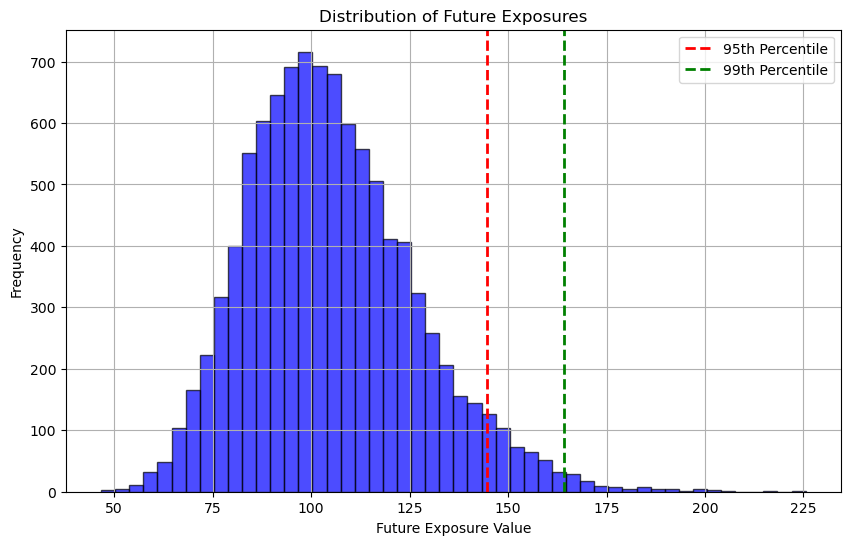

In [5]:

# Plot the distribution of future exposures
plt.figure(figsize=(10, 6))
plt.hist(future_exposures, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(expected_exposures[3], color='red', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.axvline(expected_exposures[4], color='green', linestyle='dashed', linewidth=2, label='99th Percentile')
plt.title('Distribution of Future Exposures')
plt.xlabel('Future Exposure Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


### Risk Assessment: 

The Expected Exposure (EE) is a measure used in risk management to estimate the potential future exposure of a financial instrument. 

The expected exposure (EE) was calculated at various percentiles (50th, 75th, 90th, 95th, and 99th). Using percentiles provides a clear picture of potential losses under different scenarios. For example, by calculating EE at different percentiles, it allows to assess the risk of exposure at various confidence levels e.g. the 95th percentile gives an estimate of the exposure that can expect not to exceed 95% of the time.

**Value at Risk (VaR)**

 The 95th percentile value that was obtained can be interpreted as a VaR measure if we are looking at potential losses (i.e., if you consider the future values as potential losses rather than gains).


**Decision Making**: I used a histogram plot to help understanding the distribution of potential future exposures helps in making informed decisions regarding hedging, capital allocation, and risk management strategies.




### Interpretation of the results:

The 0.95th percentile of the Expected Exposure (EE) being 144.555776 can be interpreted as follows:

- **Confidence Level**: The 0.95th percentile indicates that there is a 95% confidence level that the future exposure will not exceed 144.555776. In other words, in 95 out of 100 simulated scenarios, the exposure to the counterparty will be less than or equal to this value.

- **Risk Assessment**: This value provides a measure of potential risk associated with the counterparty. It suggests that, while 95% of the time, the exposure will be below this threshold, there is still a 5% chance that the exposure could exceed this amount. This is important for risk management, as it helps institutions prepare for potential adverse scenarios.

- **Capital Requirements**: Financial institutions may use this value to determine the amount of capital they need to hold against potential losses. Knowing that there is a 5% chance of exposure exceeding 144.555776 can inform capital allocation decisions and ensure compliance with regulatory requirements.

- **Decision Making**: The 0.95th percentile EE can guide decision-making regarding risk mitigation strategies, such as hedging or adjusting collateral requirements. If the exposure is expected to be high in certain scenarios,  proactive measures to manage that risk may be needed.



### Conclusion

In summary, the 0.95th percentile Expected Exposure of 144.555776 indicates that there is a high level of confidence (95%) that the exposure will remain below this value in future scenarios. It serves as a critical metric for assessing risk, informing capital requirements, and guiding risk management strategies.